In [1]:
# Installing graphviz issues

# !conda install python-graphviz
# !conda install -c anaconda graphviz

In [32]:
%precision %.4f
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

from IPython.core.display import HTML

In [3]:
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd

from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

import xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error


In [50]:
X, y = make_moons(n_samples=5000, noise=0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [8]:
log_clf2 = LogisticRegression()
rnd_clf2 = RandomForestClassifier()
svm_clf2 = SVC(probability=True)

voting_clf2 = VotingClassifier(
    estimators=[('lr', log_clf2), ('rf', rnd_clf2), ('svc', svm_clf2)],
    voting='soft')

voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [11]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
for clf in (log_clf2, rnd_clf2, svm_clf2, voting_clf2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
RandomForestClassifier 0.88
SVC 0.87
VotingClassifier 0.87
LogisticRegression 0.85
RandomForestClassifier 0.89
SVC 0.87
VotingClassifier 0.88


In [27]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__, " accuracy_score:", accuracy_score(y_test, y_pred_tree))

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, oob_score=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, 
      " oob_score: ", bag_clf.oob_score_, 
      " accuracy_score:", accuracy_score(y_test, y_pred)
     )
# We can access bagging classifier decision function through oob_decision_function_ :
# bag_clf.oob_decision_function_


DecisionTreeClassifier  accuracy_score: 0.82
BaggingClassifier  oob_score:  0.9275  accuracy_score: 0.9


In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)



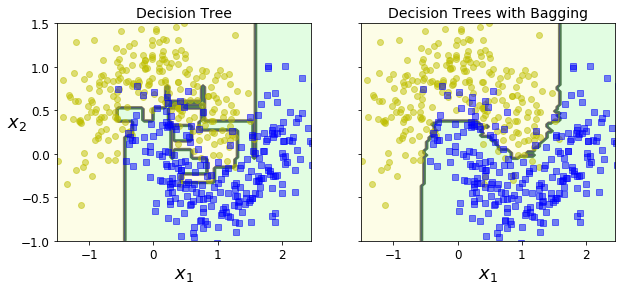

In [20]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()



In [36]:
%precision 6
np.set_printoptions(precision=4)

In [51]:
# BaggingClassifier vs RandomForestClassifer :

bag_clf2 = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16), n_estimators=500,
    max_samples=1.0, bootstrap=True, oob_score=True, n_jobs=-1)

bag_clf2.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rnd = rnd_clf.predict(X_test)

for clf in (bag_clf2, rnd_clf):
    #clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    

BaggingClassifier 0.902
RandomForestClassifier 0.905


In [52]:
%precision 4
dd = np.sum(y_pred_bag == y_pred_rnd) / len(y_pred_rnd)
print(dd, np.sum(y_pred_bag == y_pred_rnd), len(y_pred_rnd))


0.981 981 1000


In [54]:
# feature_importances - can be obtained from trained RandomForest classifiers

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"] )

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.09195857014121693
sepal width (cm) 0.02411295329149163
petal length (cm) 0.43561279883026277
petal width (cm) 0.4483156777370286


In [59]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

mnist_data, mnist_target = mnist["data"], mnist["target"]

mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_data, mnist_target, test_size=0.2, random_state=42)

mnist_rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

mnist_rnd_clf.fit(mnist_X_train, mnist_y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
mnist_y_pred = mnist_rnd_clf.predict(mnist_X_test)

print(mnist_rnd_clf.__class__.__name__, accuracy_score(mnist_y_test, mnist_y_pred))


RandomForestClassifier 0.9672857142857143


In [57]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

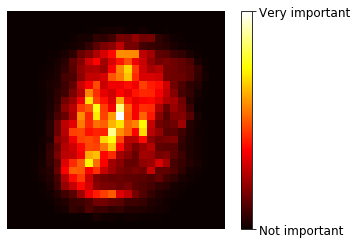

In [61]:
plot_digit(mnist_rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[mnist_rnd_clf.feature_importances_.min(), mnist_rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()


In [70]:
# Hypothessis Boosting
# train predictors sequntially , each trying to correct it's predecessor
# AdaBoost  & Gradient Boosting

# AdaBoost -> new predictor pays more attention to missed cases -> updates weights for them

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                            algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

ada_y_pred = ada_clf.predict(X_test)

print(ada_clf.__class__.__name__, accuracy_score(y_test, ada_y_pred))

AdaBoostClassifier 0.912


In [79]:
ada_params = {'base_estimator__max_depth' : [1, 2],
              'n_estimators': list(range(50,410, 10)),
             'learning_rate': [0.1, 0.2, 0.3, 0.5, 0.7]
             } 


DTC = DecisionTreeClassifier()

ABC = AdaBoostClassifier(base_estimator = DTC, algorithm="SAMME.R")

grid_search_cv = GridSearchCV(ABC, param_grid=ada_params, 
                              cv=3, verbose=1, n_jobs=-2, scoring = 'roc_auc') 
    
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  58 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-2)]: Done 217 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-2)]: Done 467 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-2)]: Done 817 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-2)]: Done 1080 out of 1080 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [85]:
df = pd.DataFrame(grid_search_cv.cv_results_)[["rank_test_score", "params", "mean_test_score"]]\
    .sort_values(by="mean_test_score", ascending=False).head(30)
display(HTML(df.to_html()))

,rank_test_score,params,mean_test_score
99,1,"{'base_estimator__max_depth': 1, 'learning_rate': 0.3, 'n_estimators': 320}",0.972876
97,2,"{'base_estimator__max_depth': 1, 'learning_rate': 0.3, 'n_estimators': 300}",0.972850
58,3,"{'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 270}",0.972831
96,4,"{'base_estimator__max_depth': 1, 'learning_rate': 0.3, 'n_estimators': 290}",0.972811
52,5,"{'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 210}",0.972809
54,6,"{'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 230}",0.972808
59,7,"{'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 280}",0.972798
57,8,"{'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 260}",0.972791
98,9,"{'base_estimator__max_depth': 1, 'learning_rate': 0.3, 'n_estimators': 310}",0.972787
53,10,"{'base_estimator__max_depth': 1, 'learning_rate': 0.2, 'n_estimators': 220}",0.972786


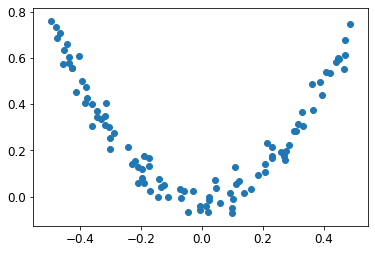

In [101]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
plt.scatter(X, y)

In [106]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

In [94]:
#Gradient boosting
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

y_2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y_2)

y_3 = y_2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y_3)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [96]:
X_new = np.array([[0.8]])

y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred
#accuracy_score(y_test, y_tree_pred)

array([0.7503])

In [98]:
# can be alos done using GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=1.0)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

min_error = np.min(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=21,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

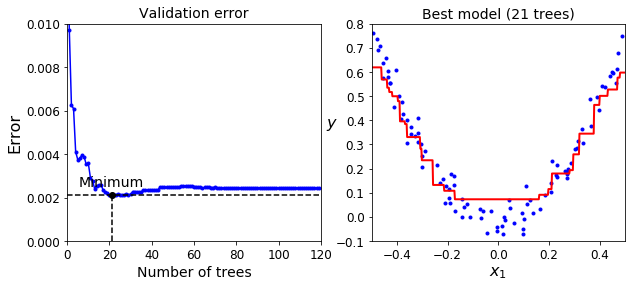

In [109]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

#save_fig("early_stopping_gbrt_plot")
plt.show()

[19:59:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:59:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.260696
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.234901
[2]	validation_0-rmse:0.211825
[3]	validation_0-rmse:0.191044
[4]	validation_0-rmse:0.173044
[5]	validation_0-rmse:0.156515
[6]	validation_0-rmse:0.141707
[7]	validation_0-rmse:0.128399
[8]	validation_0-rmse:0.116099
[9]	validation_0-rmse:0.105241
[10]	validation_0-rmse:0.095796
[11]	validation_0-rmse:0.087486
[12]	validation_0-rmse:0.080175
[13]	validation_0-rmse:0.074239
[14]	validation_0-rmse:0.069596
[15]	validation_0-rmse:0.065375
[16]	validation_0-rmse:0.061101
[17]	validation_0-rmse:0.058473
[18]	validation_0-rmse:0.056363
[19]	validation_0-rmse:0.053959
[20]	validation_0-rmse:0.05253
[21]	validation_0-rmse:0.05154
[22]	validat

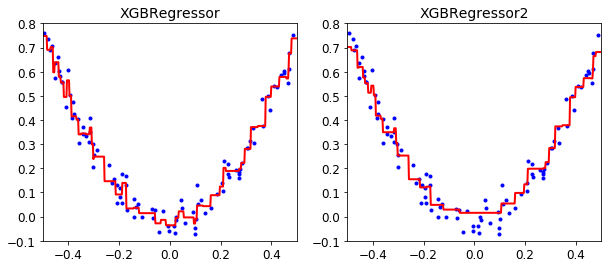

In [118]:
#  XGBoost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

xgb_reg_2 = xgboost.XGBRegressor()
xgb_reg_2.fit(X_train, y_train, 
             eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred2 = xgb_reg_2.predict(X_val)

print('XGBoost mean_squared_error: ', mean_squared_error(y_val, y_pred))
print('XGBoost2 mean_squared_error: ', mean_squared_error(y_val, y_pred2))


plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title("XGBRegressor" , fontsize=14)
plot_predictions([xgb_reg], X, y, axes=[-0.5, 0.5, -0.1, 0.8])


plt.subplot(122)
plt.title("XGBRegressor2" , fontsize=14)
plot_predictions([xgb_reg_2], X, y, axes=[-0.5, 0.5, -0.1, 0.8])

plt.show()

In [136]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

mnist_data, mnist_target = mnist["data"], mnist["target"]

mnist_X_train_val, mnist_X_test, mnist_y_train_val, mnist_y_test = train_test_split(
    mnist_data, mnist_target, test_size=0.2, random_state=42)
mnist_X_train, mnist_X_val, mnist_y_train, mnist_y_val = train_test_split(
    mnist_X_train, mnist_y_train, test_size=10000, random_state=42)


rnd_clf = RandomForestClassifier(n_estimators=100)
extra_clf = ExtraTreesClassifier(n_estimators=100)
mlp_clf = MLPClassifier()
lin_svm_clf = LinearSVC()

voting_clf_hard = VotingClassifier(
    estimators=[('rf', rnd_clf), ('extra', extra_clf), ('mlp', mlp_clf), ('lin_svm_clf', lin_svm_clf)],
    voting='hard')

#voting_clf_soft = VotingClassifier(
#    estimators=[('rf', rnd_clf), ('extra', extra_clf), ('mlp', mlp_clf), ('lin_svm_clf', lin_svm_clf)],
#    voting='soft')

voting_clf_hard.fit(mnist_X_train, mnist_y_train)

voting_clf_hard.score(mnist_X_val, mnist_y_val)
estimator_scores = [estimator.score(mnist_X_val, mnist_y_val) for estimator in voting_clf_hard.estimators_]

#for clf in (rnd_clf, extra_clf, mlp_clf, lin_svm_clf, voting_clf_hard):
    #clf.fit(mnist_X_train, mnist_y_train)
#    y_pred = clf.predict(mnist_X_test) 
#    print(clf.__class__.__name__, accuracy_score(mnist_y_test, y_pred))


c:\Users\michal\Anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [130]:
print(voting_clf_hard.score(mnist_X_val, mnist_y_val))
print(estimator_scores)
print(voting_clf_hard.estimators_)



0.9694285714285714
[0.9671428571428572, 0.9710714285714286, 0.9638571428571429, 0.8725]
[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                    

In [137]:
voting_clf_hard.set_params(lin_svm_clf=None)
del voting_clf_hard.estimators_[3]

print(voting_clf_hard.estimators_)



[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_s

In [138]:
#estimator_scores = [estimator.score(mnist_X_test, mnist_y_test) for estimator in voting_clf_hard.estimators_]
print("voting_clf_hard score:", voting_clf_hard.score(mnist_X_val, mnist_y_val))
#print(estimator_scores)

voting_clf_hard score: 0.9709


In [140]:
# Stacking ensemble
X_val_predictions = np.empty((len(mnist_X_val), len(voting_clf_hard.estimators)), dtype=np.float32)
#X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(voting_clf_hard.estimators_):
    X_val_predictions[:, index] = estimator.predict(mnist_X_val)

In [141]:
X_val_predictions

array([[6.00e+00, 6.00e+00, 6.00e+00, 1.06e-42],
       [3.00e+00, 3.00e+00, 3.00e+00, 0.00e+00],
       [5.00e+00, 5.00e+00, 5.00e+00, 0.00e+00],
       ...,
       [4.00e+00, 4.00e+00, 4.00e+00, 0.00e+00],
       [6.00e+00, 6.00e+00, 6.00e+00, 0.00e+00],
       [8.00e+00, 8.00e+00, 8.00e+00, 0.00e+00]], dtype=float32)

In [143]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, mnist_y_val)

rnd_forest_blender.oob_score_

0.9692